### Import Relevant Libraries

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [38]:
X,Y = make_classification(n_samples=400,n_classes=2,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=3)

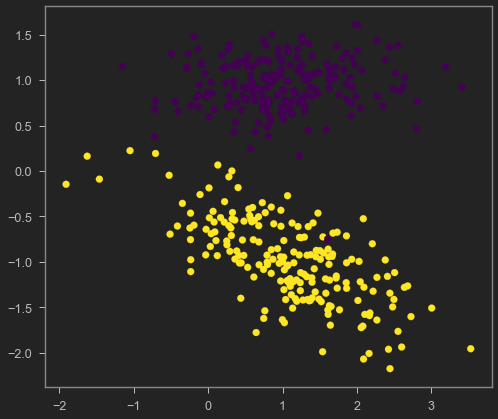

In [39]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [40]:
np.unique(Y)

array([0, 1])

In [41]:
# Convert class 0 into -1
Y[Y==0] = -1
np.unique(Y)

array([-1,  1])

In [42]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeloss(self,W,b,X,Y):
        loss = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        for i in range(X.shape[0]):
            
            ti = Y[i]*(np.dot(W,X[i].T) + b)
            loss += self.C*max(0,1-ti)
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n=learning_rate
        
        # Init the model parameters
        
        W = np.zeros((1,no_of_features))
        bias = 0
        
        print(self.hingeloss(W,bias,X,Y))
        
        # Training from here
        # Weight and bias update rule
        losses = []
        
        for i in range(maxItr):
            
            l = self.hingeloss(W,bias,X,Y)
            losses.append(l)
            
            # Batch Gradient Descent with random shuffling
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                
                # Assume Gradient 0 for the batch 
                gradw = 0
                gradb = 0
                
                # Iterating over the mini-batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T) + bias)
                        
                        if ti>1:
                            gradw +=0
                            gradb +=0
                        else:
                            gradw += self.C*X[i]*Y[i]
                            gradb += self.C*Y[i]
                            
                # Gradient for mini-batch is ready! Update W,bias
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        self.W = W
        self.b = bias
        return W,bias,losses

In [43]:
svm = SVM()

In [44]:
W,b,losses = svm.fit(X,Y,maxItr=100)

400.0


In [45]:
print(losses[0], losses[-1])

400.0 14.962093638333748


### Visualizing Losses and Decision Boundary

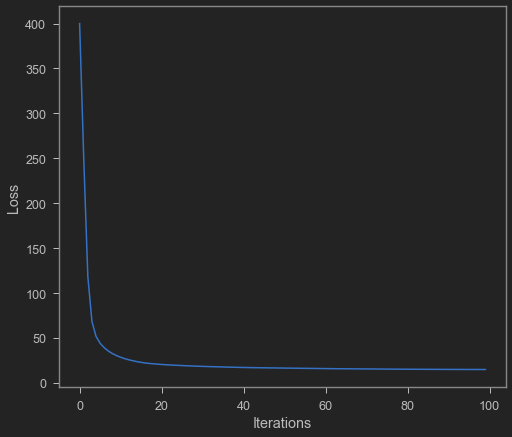

In [46]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [55]:
def plotDecisionBoundary(w1,w2,b):
    plt.figure(figsize=(12,12))

    x1 = np.linspace(-2,3,10)
    x2 = -1*(W[0,0]*x1 + b)/W[0,1] # WT + b = 0
    
    x_p = -1*(W[0,0]*x1 + b - 1)/W[0,1] # WT + b = 1 (+ve class) 
    x_n = -1*(W[0,0]*x1 + b + 1)/W[0,1] # WT + b = -1 (-ve class)
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    
    plt.plot(x1,x_p,color='green',label='+ve Hyperplane')
    plt.plot(x1,x_n,color='blue',label='-ve Hyperplane')
    plt.plot(x1,x2,color='red',label='Decision Boundary')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

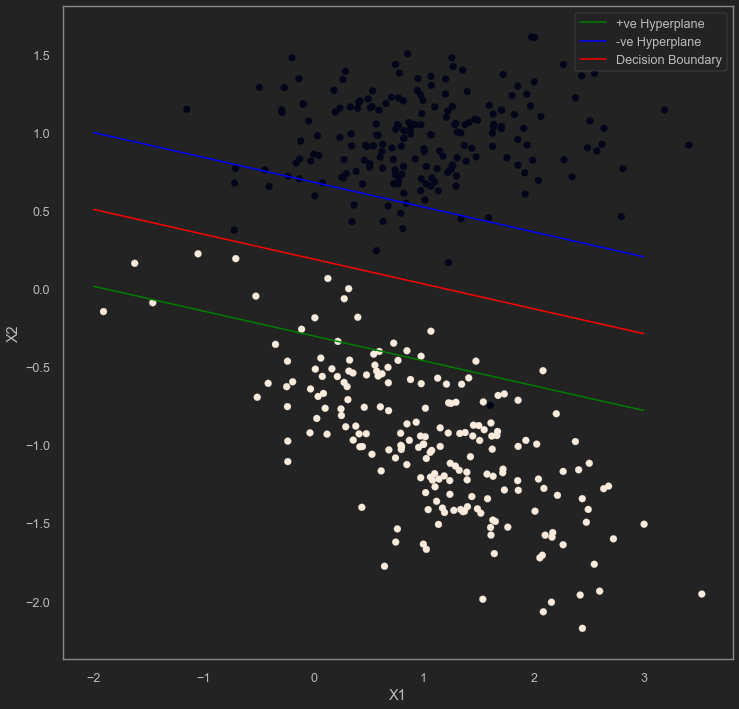

In [56]:
plotDecisionBoundary(W[0,0],W[0,1],b)